## Hamoye ML Project Electric Cars - Team Prophet v3.2

#### The aim of this project was to predict EV prices based on various features and utilities.

This experiment version 3.2 is based on following points:
#Replace fast-charge null with numeical value zero, as few cars don't support fast-charge.
#Keep Outliers in price germany
#German null prices get from pound and netherland columns.
#Train Test Split Random state=101, test_size= 0.3
#Encoding for Vehicle Names using pd.get_dummies method
#Drop Seats column from features, as it doesnt have linear relation with price.
#This is final iteration of experiment.

#### The data was scraped from Web, source URL: https://ev-database.org/

In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('D:\People\Amit\Hamoye\project\\electric_cars.csv', index_col=0)

In [3]:
df.head()

,vehicle_name,model,battery,seats,acceleration,top_speed,distance,efficiency,fast_charge,price_pounds,price_germany,price_netherland
0,Renault,Megane E-Tech EV60 220hp,60.0,5,7.4,160,360,167,520,"£35,000","€40,000","€40,000"
1,Tesla,Model 3 Standard Range Plus LFP,52.5,5,5.6,225,350,150,630,"40,990","43,560","49,990"
2,Kia,EV6 GT,77.4,5,3.5,260,395,196,920,"58,295","65,990","63,595"
3,Tesla,Model Y Long Range Dual Motor,70.0,7,5.0,217,410,171,590,"£54,000","59,965","65,010"
4,Skoda,Enyaq iV 80,77.0,5,8.6,160,420,183,510,"39,365","43,950","47,780"


#### Data dictionary
#vehicle_name : EV brand name
#model : Specific car model 
#battery : Capacity of battery in kWh
#seats : No. of seats in the car
#acceleration : Time required to accelerate 0-100km/h in seconds
#top_speed : Top speed of car in km/h
#distance : Range(distance covered) in single charge of battery in km
#efficiency : The amount of energy used to move car one unit of distance in Wh/km
#fast_charge : No. of km added to the range during charging per hour in km/h

In [4]:
# check the data-types
df.dtypes

vehicle_name         object
model                object
battery             float64
seats                 int64
acceleration        float64
top_speed             int64
distance              int64
efficiency            int64
fast_charge          object
price_pounds         object
price_germany        object
price_netherland     object
dtype: object

In [5]:
#Check Null values
df.isnull().sum()

vehicle_name        0
model               0
battery             0
seats               0
acceleration        0
top_speed           0
distance            0
efficiency          0
fast_charge         0
price_pounds        0
price_germany       0
price_netherland    0
dtype: int64

In [6]:
# Find '-' in dataset
df[df.isin(['-'])].stack()

78   fast_charge    -
113  fast_charge    -
125  fast_charge    -
140  fast_charge    -
169  fast_charge    -
dtype: object

In [7]:
# Replace string '-' with Null Value
df['fast_charge']=df['fast_charge'].replace(to_replace='-', value=np.NaN)

In [8]:
# Considering the fact that five vehicles dont have Fast Charge we will replace the string - with zero
df['fast_charge'] = df['fast_charge'].replace(to_replace=np.nan, value=0)

In [9]:
df.dtypes

vehicle_name         object
model                object
battery             float64
seats                 int64
acceleration        float64
top_speed             int64
distance              int64
efficiency            int64
fast_charge          object
price_pounds         object
price_germany        object
price_netherland     object
dtype: object

In [10]:
# Now convert fast-charge to Numeric type 
df = df.astype({'fast_charge': np.int})

In [11]:
df['fast_charge'].isnull().sum()

0

In [12]:
df.dtypes

vehicle_name         object
model                object
battery             float64
seats                 int64
acceleration        float64
top_speed             int64
distance              int64
efficiency            int64
fast_charge           int32
price_pounds         object
price_germany        object
price_netherland     object
dtype: object

In [13]:
#Cleaning comma(,), curency symbols(£,€), and replacing N/A(/A) values with Null(NaN) from price_pounds.
df['price_pounds'] = df['price_pounds'].str.replace(',', '')
df['price_pounds'] = df['price_pounds'].str.replace('£', '')
df['price_pounds'] = df['price_pounds'].str.replace('€', '')
df['price_pounds'] = df['price_pounds'].str.replace('/A', '')
df['price_pounds'] = df['price_pounds'].replace(to_replace='', value=np.NaN)

In [14]:
#Check its Null values
df['price_pounds'].isnull().sum()

44

In [15]:
#Check its dtype
df['price_pounds'].dtype

dtype('O')

In [16]:
#Convert it into numeric type
df = df.astype({'price_pounds': np.float32})

In [17]:
# Check its dtype again
df['price_pounds'].dtype

dtype('float32')

#### Now we do similar cleaning for price_germany and price_netherland

In [18]:
#Cleaning comma(,), curency symbols(£,€), and replacing N/A(/A) values with Null(NaN).
df['price_germany'] = df['price_germany'].str.replace(',', '')
df['price_germany'] = df['price_germany'].str.replace('£', '')
df['price_germany'] = df['price_germany'].str.replace('€', '')
df['price_germany'] = df['price_germany'].str.replace('/A', '')
df['price_germany'] = df['price_germany'].replace(to_replace='', value=np.NaN)
#Converting it to Numric data-type
df = df.astype({'price_germany': np.float32})

In [19]:
#Cleaning comma(,), curency symbols(£,€), and replacing N/A(/A) values with Null(NaN).
df['price_netherland'] = df['price_netherland'].str.replace(',', '')
df['price_netherland'] = df['price_netherland'].str.replace('£', '')
df['price_netherland'] = df['price_netherland'].str.replace('€', '')
df['price_netherland'] = df['price_netherland'].str.replace('/A', '')
df['price_netherland'] = df['price_netherland'].replace(to_replace='', value=np.NaN)
#Converting it to Numric data-type
df = df.astype({'price_netherland': np.float32})

In [20]:
#Check overall data-type
df.dtypes

vehicle_name         object
model                object
battery             float64
seats                 int64
acceleration        float64
top_speed             int64
distance              int64
efficiency            int64
fast_charge           int32
price_pounds        float32
price_germany       float32
price_netherland    float32
dtype: object

In [21]:
#Check overall Null values
df.isnull().sum()

vehicle_name         0
model                0
battery              0
seats                0
acceleration         0
top_speed            0
distance             0
efficiency           0
fast_charge          0
price_pounds        44
price_germany       13
price_netherland    25
dtype: int64

#### The three price columns have Null values, and price_germany has least Null Values. It is suggested that instead of keeping prices in three different currencies, we can convert the price to universal currency USD value.

## Considerations before replacing Null values

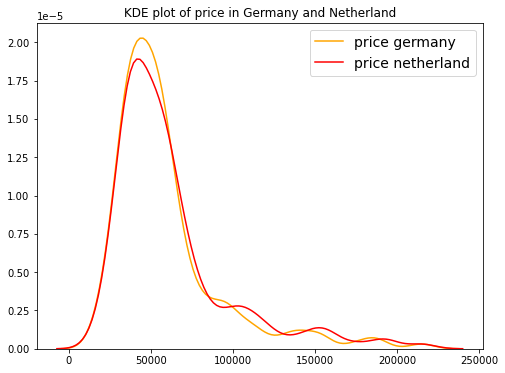

In [22]:
#Comparing price in germany and netherland
plt.figure(figsize=(8,6))
sns.kdeplot(df['price_germany'], color='orange', label='price germany')
sns.kdeplot(df['price_netherland'], color='red', label='price netherland')
plt.title('KDE plot of price in Germany and Netherland')
plt.legend(loc='upper right', fontsize=14)
plt.show()

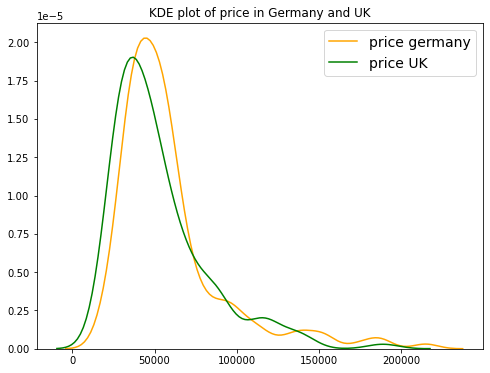

In [23]:
#Comparing price in germany and UK(pounds)
plt.figure(figsize=(8,6))
sns.kdeplot(df['price_germany'], color='orange', label='price germany')
sns.kdeplot(df['price_pounds'], color='green', label='price UK')
plt.title('KDE plot of price in Germany and UK')
plt.legend(loc='upper right', fontsize=14)
plt.show()

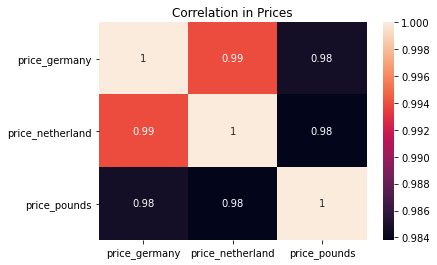

In [24]:
## Correlation in prices at Germany, Netherland, UK
pricing = df[['price_germany','price_netherland','price_pounds']]
pricing_corr = pricing.corr()
plt.figure(figsize=(6,4))
plt.title('Correlation in Prices')
sns.heatmap(pricing_corr, annot=True)
plt.show()

#### As the prices in three regions are correlated, hence we will fill German price Null values using prices available in UK(pounds to be converted to Euro) or Netherland(Euro) for the same car.

In [25]:
## Filling Null Values in germany using pounds and netherland
for i in range(len(df)):
    if (df.isna()['price_germany'][i]):
        if (df['price_pounds'][i]!=0) and (not df.isna()['price_pounds'][i]):
            df['price_germany'][i] = round(df['price_pounds'][i]/1.17)
        elif (df['price_netherland'][i]!=0) and (not df.isna()['price_netherland'][i]):
             df['price_germany'][i]= round(df['price_netherland'][i])
    
df.isnull().sum()

<ipython-input-25-faf00be62bd2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price_germany'][i] = round(df['price_pounds'][i]/1.17)
<ipython-input-25-faf00be62bd2>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price_germany'][i]= round(df['price_netherland'][i])


vehicle_name         0
model                0
battery              0
seats                0
acceleration         0
top_speed            0
distance             0
efficiency           0
fast_charge          0
price_pounds        44
price_germany        0
price_netherland    25
dtype: int64

In [26]:
df.dtypes

vehicle_name         object
model                object
battery             float64
seats                 int64
acceleration        float64
top_speed             int64
distance              int64
efficiency            int64
fast_charge           int32
price_pounds        float32
price_germany       float32
price_netherland    float32
dtype: object

In [27]:
#### Now we use price_germany to get prices in USD
df['price_usd'] = round((df['price_germany']/1.18))

In [28]:
df.head()

,vehicle_name,model,battery,seats,acceleration,top_speed,distance,efficiency,fast_charge,price_pounds,price_germany,price_netherland,price_usd
0,Renault,Megane E-Tech EV60 220hp,60.0,5,7.4,160,360,167,520,35000.0,40000.0,40000.0,33898.0
1,Tesla,Model 3 Standard Range Plus LFP,52.5,5,5.6,225,350,150,630,40990.0,43560.0,49990.0,36915.0
2,Kia,EV6 GT,77.4,5,3.5,260,395,196,920,58295.0,65990.0,63595.0,55924.0
3,Tesla,Model Y Long Range Dual Motor,70.0,7,5.0,217,410,171,590,54000.0,59965.0,65010.0,50818.0
4,Skoda,Enyaq iV 80,77.0,5,8.6,160,420,183,510,39365.0,43950.0,47780.0,37246.0


In [29]:
df.isnull().sum()

vehicle_name         0
model                0
battery              0
seats                0
acceleration         0
top_speed            0
distance             0
efficiency           0
fast_charge          0
price_pounds        44
price_germany        0
price_netherland    25
price_usd            0
dtype: int64

In [30]:
df.dtypes

vehicle_name         object
model                object
battery             float64
seats                 int64
acceleration        float64
top_speed             int64
distance              int64
efficiency            int64
fast_charge           int32
price_pounds        float32
price_germany       float32
price_netherland    float32
price_usd           float32
dtype: object

In [31]:
#Save a clean copy of data after treating Null values wherever necessary
df.to_csv('D:\People\Amit\Hamoye\project\\electric_cars_13sep.csv')

## Insights from Data

## Top 5 Costliest EV Brands as per Average price value ($ USD) of their Models.

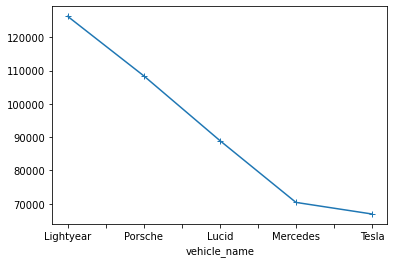

In [32]:
df.groupby('vehicle_name')['price_usd'].mean().sort_values(ascending=False).head().plot(x='vehicle_name',marker='+',markersize=6)
plt.show()

## Top 5 EV Brands with maximum no. of Models/Variants.

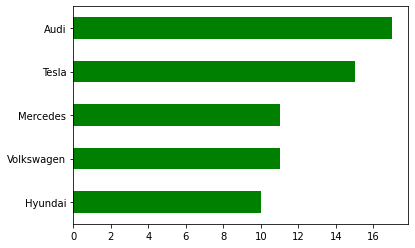

In [33]:
df['vehicle_name'].value_counts().sort_values(ascending=True).tail(5).plot(kind='barh',color='g')
plt.show()

## Top 5 Models with Highest speed (km/h)

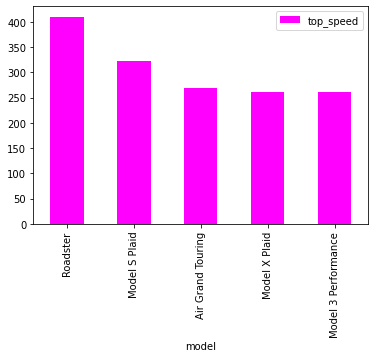

In [34]:
df1 = df[['vehicle_name','model','top_speed']]
df1.sort_values('top_speed',ascending=False).head().plot(x='model',kind='bar',color='magenta')
plt.show()

## Top 5 Cars with highest Battery back-up (kWh)

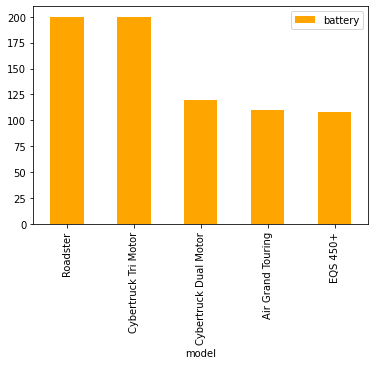

In [35]:
df2 = df[['vehicle_name','model','battery']]
df2.sort_values('battery',ascending=False).head().plot(x='model',kind='bar', color='orange')
plt.show()

## Correlation among EV features

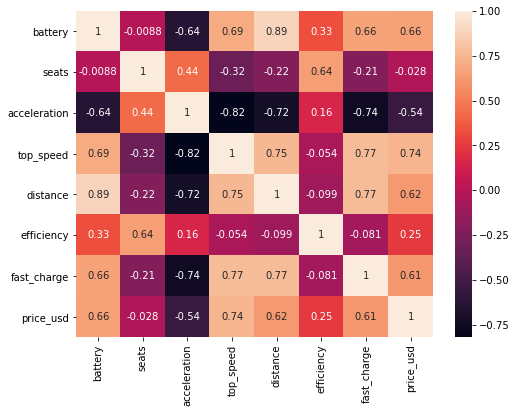

In [36]:
features1 = df[['battery', 'seats', 'acceleration', 'top_speed', 'distance', 'efficiency', 'fast_charge', 'price_usd']]
corr = features1.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True)
plt.show()

## Categorical Variables Encoding

In [37]:
## Replacing categorical variable Vehicle brand name to numerical values using One Hot Encoding
df_encoded = pd.get_dummies(df, columns=['vehicle_name'])

In [38]:
df_encoded.head()

,model,battery,seats,acceleration,top_speed,distance,efficiency,fast_charge,price_pounds,price_germany,...,vehicle_name_Renault,vehicle_name_SEAT,vehicle_name_Seres,vehicle_name_Skoda,vehicle_name_Smart,vehicle_name_Sono,vehicle_name_Tesla,vehicle_name_Toyota,vehicle_name_Volkswagen,vehicle_name_Volvo
0,Megane E-Tech EV60 220hp,60.0,5,7.4,160,360,167,520,35000.0,40000.0,...,1,0,0,0,0,0,0,0,0,0
1,Model 3 Standard Range Plus LFP,52.5,5,5.6,225,350,150,630,40990.0,43560.0,...,0,0,0,0,0,0,1,0,0,0
2,EV6 GT,77.4,5,3.5,260,395,196,920,58295.0,65990.0,...,0,0,0,0,0,0,0,0,0,0
3,Model Y Long Range Dual Motor,70.0,7,5.0,217,410,171,590,54000.0,59965.0,...,0,0,0,0,0,0,1,0,0,0
4,Enyaq iV 80,77.0,5,8.6,160,420,183,510,39365.0,43950.0,...,0,0,0,1,0,0,0,0,0,0


## Features and Target

In [39]:
# In this version we decided to drop Seats and use vehicle names with coding using pd.get_dummies in Features
features = df_encoded.drop(['model','seats','price_pounds','price_germany','price_netherland','price_usd'],axis=1)
y = df['price_usd']

In [40]:
features.head()

,battery,acceleration,top_speed,distance,efficiency,fast_charge,vehicle_name_Aiways,vehicle_name_Audi,vehicle_name_BMW,vehicle_name_Byton,...,vehicle_name_Renault,vehicle_name_SEAT,vehicle_name_Seres,vehicle_name_Skoda,vehicle_name_Smart,vehicle_name_Sono,vehicle_name_Tesla,vehicle_name_Toyota,vehicle_name_Volkswagen,vehicle_name_Volvo
0,60.0,7.4,160,360,167,520,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,52.5,5.6,225,350,150,630,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,77.4,3.5,260,395,196,920,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,70.0,5.0,217,410,171,590,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,77.0,8.6,160,420,183,510,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [41]:
features.tail()

,battery,acceleration,top_speed,distance,efficiency,fast_charge,vehicle_name_Aiways,vehicle_name_Audi,vehicle_name_BMW,vehicle_name_Byton,...,vehicle_name_Renault,vehicle_name_SEAT,vehicle_name_Seres,vehicle_name_Skoda,vehicle_name_Smart,vehicle_name_Sono,vehicle_name_Tesla,vehicle_name_Toyota,vehicle_name_Volkswagen,vehicle_name_Volvo
179,45.0,12.1,130,185,243,250,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
180,45.0,12.1,130,185,243,250,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
181,45.0,12.1,130,185,243,250,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
182,45.0,13.1,130,185,243,250,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
183,45.0,12.1,130,180,250,240,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
y.head()

0    33898.0
1    36915.0
2    55924.0
3    50818.0
4    37246.0
Name: price_usd, dtype: float32

## Normalizing the data using MinMax Scaler

In [43]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x = pd.DataFrame(scaler.fit_transform(features), columns=features.columns)

In [44]:
x.head()

,battery,acceleration,top_speed,distance,efficiency,fast_charge,vehicle_name_Aiways,vehicle_name_Audi,vehicle_name_BMW,vehicle_name_Byton,...,vehicle_name_Renault,vehicle_name_SEAT,vehicle_name_Seres,vehicle_name_Skoda,vehicle_name_Smart,vehicle_name_Sono,vehicle_name_Tesla,vehicle_name_Toyota,vehicle_name_Volkswagen,vehicle_name_Volvo
0,0.236225,0.261084,0.128920,0.302857,0.355932,0.368794,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.195308,0.172414,0.355401,0.291429,0.259887,0.446809,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.331151,0.068966,0.477352,0.342857,0.519774,0.652482,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.290780,0.142857,0.327526,0.360000,0.378531,0.418440,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.328969,0.320197,0.128920,0.371429,0.446328,0.361702,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
x.tail()

,battery,acceleration,top_speed,distance,efficiency,fast_charge,vehicle_name_Aiways,vehicle_name_Audi,vehicle_name_BMW,vehicle_name_Byton,...,vehicle_name_Renault,vehicle_name_SEAT,vehicle_name_Seres,vehicle_name_Skoda,vehicle_name_Smart,vehicle_name_Sono,vehicle_name_Tesla,vehicle_name_Toyota,vehicle_name_Volkswagen,vehicle_name_Volvo
179,0.154392,0.492611,0.02439,0.102857,0.785311,0.177305,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
180,0.154392,0.492611,0.02439,0.102857,0.785311,0.177305,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
181,0.154392,0.492611,0.02439,0.102857,0.785311,0.177305,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
182,0.154392,0.541872,0.02439,0.102857,0.785311,0.177305,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
183,0.154392,0.492611,0.02439,0.097143,0.824859,0.170213,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Train Test Split


In [46]:
## Train Test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

## Linear Regression


In [47]:
# Import Linear Regression Model
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
#fit the model to the training dataset
linear_model.fit(x_train, y_train)
#obtain predictions
pred_1 = linear_model.predict(x_test)

In [48]:
# Import Metrics for evaluation
from sklearn import metrics

In [49]:
print('Mean Absolute Error (MAE)', metrics.mean_absolute_error(y_test,pred_1))
print('Mean Square Error (MSE)', metrics.mean_squared_error(y_test,pred_1))
print('Root Mean Square Error (RMSE)', np.sqrt(metrics.mean_squared_error(y_test,pred_1)))
print('R2 score', metrics.r2_score(y_test,pred_1))
print('Explained Variance score', metrics.explained_variance_score(y_test,pred_1))

Mean Absolute Error (MAE) 8729.888287493433
Mean Square Error (MSE) 266966761.3825944
Root Mean Square Error (RMSE) 16339.117521536908
R2 score 0.7011794306433308
Explained Variance score 0.7036178278326817


## Random Forest with Estimators 300

In [50]:
#Import Random Forest Estimators 300
from sklearn.ensemble import RandomForestRegressor
rfc_300 = RandomForestRegressor(n_estimators=300)
rfc_300.fit(x_train,y_train)
pred_2 = rfc_300.predict(x_test)

In [51]:
print('Mean Absolute Error (MAE)', metrics.mean_absolute_error(y_test,pred_2))
print('Mean Square Error (MSE)', metrics.mean_squared_error(y_test,pred_2))
print('Root Mean Square Error (RMSE)', np.sqrt(metrics.mean_squared_error(y_test,pred_2)))
print('R2 score', metrics.r2_score(y_test,pred_2))
print('Explained Variance score', metrics.explained_variance_score(y_test,pred_2))

Mean Absolute Error (MAE) 8135.583888888888
Mean Square Error (MSE) 276589849.0656766
Root Mean Square Error (RMSE) 16630.990621898523
R2 score 0.6904081401443359
Explained Variance score 0.6935039645565302


## Random Forest with Estimators 400

In [52]:
rfc_400 = RandomForestRegressor(n_estimators=400)
rfc_400.fit(x_train,y_train)
pred_3 = rfc_400.predict(x_test)

In [53]:
print('Mean Absolute Error (MAE)', metrics.mean_absolute_error(y_test,pred_3))
print('Mean Square Error (MSE)', metrics.mean_squared_error(y_test,pred_3))
print('Root Mean Square Error (RMSE)', np.sqrt(metrics.mean_squared_error(y_test,pred_3)))
print('R2 score', metrics.r2_score(y_test,pred_3))
print('Explained Variance score', metrics.explained_variance_score(y_test,pred_3))

Mean Absolute Error (MAE) 7950.1963619260205
Mean Square Error (MSE) 273212877.7341929
Root Mean Square Error (RMSE) 16529.152359821506
R2 score 0.6941880432706616
Explained Variance score 0.6975016350951861


## Random Forest with Estimators 500

In [54]:
rfc_500 = RandomForestRegressor(n_estimators=500)
rfc_500.fit(x_train,y_train)
pred_4 = rfc_500.predict(x_test)

In [55]:
print('Mean Absolute Error (MAE)', metrics.mean_absolute_error(y_test,pred_4))
print('Mean Square Error (MSE)', metrics.mean_squared_error(y_test,pred_4))
print('Root Mean Square Error (RMSE)', np.sqrt(metrics.mean_squared_error(y_test,pred_4)))
print('R2 score', metrics.r2_score(y_test,pred_4))
print('Explained Variance score', metrics.explained_variance_score(y_test,pred_4))

Mean Absolute Error (MAE) 8053.685097066327
Mean Square Error (MSE) 271088569.3930343
Root Mean Square Error (RMSE) 16464.767517126813
R2 score 0.696565818783638
Explained Variance score 0.6996530093806419


## Random Forest with Estimators 600

In [56]:
rfc_600 = RandomForestRegressor(n_estimators=600)
rfc_600.fit(x_train,y_train)
pred_5 = rfc_600.predict(x_test)

In [57]:
print('Mean Absolute Error (MAE)', metrics.mean_absolute_error(y_test,pred_5))
print('Mean Square Error (MSE)', metrics.mean_squared_error(y_test,pred_5))
print('Root Mean Square Error (RMSE)', np.sqrt(metrics.mean_squared_error(y_test,pred_5)))
print('R2 score', metrics.r2_score(y_test,pred_5))
print('Explained Variance score', metrics.explained_variance_score(y_test,pred_5))

Mean Absolute Error (MAE) 8063.327049142573
Mean Square Error (MSE) 272463868.9879423
Root Mean Square Error (RMSE) 16506.479606140805
R2 score 0.6950264218719848
Explained Variance score 0.6974374794777678


## Random Forest with Estimators 700

In [58]:
rfc_700 = RandomForestRegressor(n_estimators=700)
rfc_700.fit(x_train,y_train)
pred_6 = rfc_700.predict(x_test)

In [59]:
print('Mean Absolute Error (MAE)', metrics.mean_absolute_error(y_test,pred_6))
print('Mean Square Error (MSE)', metrics.mean_squared_error(y_test,pred_6))
print('Root Mean Square Error (RMSE)', np.sqrt(metrics.mean_squared_error(y_test,pred_6)))
print('R2 score', metrics.r2_score(y_test,pred_6))
print('Explained Variance score', metrics.explained_variance_score(y_test,pred_6))

Mean Absolute Error (MAE) 7861.6719524113205
Mean Square Error (MSE) 268659330.2515928
Root Mean Square Error (RMSE) 16390.83067606986
R2 score 0.6992849086792852
Explained Variance score 0.7025497110013783


## Random Forest with Estimators 800

In [60]:
rfc_800 = RandomForestRegressor(n_estimators=800)
rfc_800.fit(x_train,y_train)
pred_7 = rfc_800.predict(x_test)

In [61]:
print('Mean Absolute Error (MAE)', metrics.mean_absolute_error(y_test,pred_7))
print('Mean Square Error (MSE)', metrics.mean_squared_error(y_test,pred_7))
print('Root Mean Square Error (RMSE)', np.sqrt(metrics.mean_squared_error(y_test,pred_7)))
print('R2 score', metrics.r2_score(y_test,pred_7))
print('Explained Variance score', metrics.explained_variance_score(y_test,pred_7))

Mean Absolute Error (MAE) 7980.751054368623
Mean Square Error (MSE) 272362278.4466277
Root Mean Square Error (RMSE) 16503.40202644981
R2 score 0.6951401339432541
Explained Variance score 0.6987691717852748


## Random Forest with Estimators 900

In [62]:
rfc_900 = RandomForestRegressor(n_estimators=900)
rfc_900.fit(x_train,y_train)
pred_8 = rfc_900.predict(x_test)

In [63]:
print('Mean Absolute Error (MAE)', metrics.mean_absolute_error(y_test,pred_8))
print('Mean Square Error (MSE)', metrics.mean_squared_error(y_test,pred_8))
print('Root Mean Square Error (RMSE)', np.sqrt(metrics.mean_squared_error(y_test,pred_8)))
print('R2 score', metrics.r2_score(y_test,pred_8))
print('Explained Variance score', metrics.explained_variance_score(y_test,pred_8))

Mean Absolute Error (MAE) 8039.982573011148
Mean Square Error (MSE) 271913535.4686009
Root Mean Square Error (RMSE) 16489.800952970927
R2 score 0.6956424198139532
Explained Variance score 0.6982465205224998


## Xgboost Model

In [64]:
## Xgboost#Xgboost Model
from xgboost import XGBRegressor
xgb = XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)
xgb.fit(x_train,y_train)
pred_9 = xgb.predict(x_test)

In [65]:
print('Mean Absolute Error (MAE)', metrics.mean_absolute_error(y_test,pred_9))
print('Mean Square Error (MSE)', metrics.mean_squared_error(y_test,pred_9))
print('Root Mean Square Error (RMSE)', np.sqrt(metrics.mean_squared_error(y_test,pred_9))) #RMSE
print('R2 score', metrics.r2_score(y_test,pred_9)) #R2 Score
print('Explained Variance score', metrics.explained_variance_score(y_test,pred_9))

Mean Absolute Error (MAE) 7153.366
Mean Square Error (MSE) 237203310.0
Root Mean Square Error (RMSE) 15401.406
R2 score 0.7344941401394225
Explained Variance score 0.7363026142120361


## End of Notebook